In [811]:
# Importing libraries
import pandas as pd
import numpy as np
import sklearn
import openpyxl
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [812]:
# Loading the sleep data
sleep_Data = pd.read_csv('AutoSleep-data.csv')
print(sleep_Data.head())
# Creating a new column called 'Date' getting only the date from ISO8601 column
sleep_Data['Date'] = sleep_Data['ISO8601'].str.split('T').str[0]
# showing Date column head
print(sleep_Data['Date'].head())
# Creating a new dataframe with only the Date and Dormido columns
sleep_Data = sleep_Data[['Date', 'dormido']]

                     ISO8601                    deFecha  \
0  2022-12-01T23:59:59+01:00   jueves, 1 de dic de 2022   
1  2022-12-02T23:59:59+01:00  viernes, 2 de dic de 2022   
2  2022-12-03T23:59:59+01:00   sábado, 3 de dic de 2022   
3  2022-12-04T23:59:59+01:00  domingo, 4 de dic de 2022   
4  2022-12-05T23:59:59+01:00    lunes, 5 de dic de 2022   

                      aFecha         horaDedormir    horaDedespertarse  \
0   jueves, 1 de dic de 2022  2022-12-01 00:30:00  2022-12-01 08:30:00   
1  viernes, 2 de dic de 2022  2022-12-02 01:30:00  2022-12-02 09:15:00   
2   sábado, 3 de dic de 2022  2022-12-03 01:47:00  2022-12-03 09:44:00   
3  domingo, 4 de dic de 2022  2022-12-04 00:45:00  2022-12-04 13:45:00   
4    lunes, 5 de dic de 2022  2022-12-05 01:42:00  2022-12-05 06:30:00   

     enCama despierto seDurmióEn  sesiones   dormido  ... VFCdormido  \
0  08:35:00  00:10:00   00:00:00         2  08:25:00  ...       44.0   
1  07:45:00  00:15:00        NaN         1  07:30:00  ..

In [813]:
import pandas as pd

# Load the excel file into a dictionary of dataframes, with sheet names as keys
xl_file = pd.read_excel("MacroFactor-data.xlsx", sheet_name=None)

# Create an empty list to store the filtered sheets
filtered_sheets = []

# Loop through each sheet in the dictionary
for sheet_name, sheet_df in xl_file.items():
    # Check if the "Date" column exists in the current sheet
    if "Date" in sheet_df.columns:
        # Check if the "Date" column contains any non-null values
        if sheet_df["Date"].notnull().any():
            filtered_sheets.append(sheet_df)

# Combine the filtered sheets into a single dataframe
df = pd.concat(filtered_sheets)

# Reset the index
df = df.reset_index(drop=True)
# Drop dates that are earlier than 2023
df = df[df['Date'] > '2023-01-01']
# Show df head
print(df.head())
# Convert Datetime to date
df['Date'] = pd.to_datetime(df['Date']).dt.date
# save dataframe to excel file
df.to_excel('MacroFactor-data_test.xlsx', index=True)


        Date Weight (kg)  Fat Percent Calories (kcal) Protein (g) Fat (g)  \
5 2023-01-02        88.1         27.1             NaN         NaN     NaN   
6 2023-01-03       87.25         26.8             NaN         NaN     NaN   
7 2023-01-04       87.25         26.7             NaN         NaN     NaN   
8 2023-01-05   86.800003         26.4             NaN         NaN     NaN   
9 2023-01-06        86.3         26.3             NaN         NaN     NaN   

  Carbs (g)  Visual Body Fat Assessment  Expenditure  Trend Weight (kg)  \
5       NaN                         NaN          NaN                NaN   
6       NaN                         NaN          NaN                NaN   
7       NaN                         NaN          NaN                NaN   
8       NaN                         NaN          NaN                NaN   
9       NaN                         NaN          NaN                NaN   

  Target Calories (kcal) Target Protein (g) Target Fat (g) Target Carbs (g)  
5       

In [814]:
# Print sleep date date type
print(type(sleep_Data['Date'][0]))
# Change Dattype to date
sleep_Data['Date'] = pd.to_datetime(sleep_Data['Date']).dt.date
# print df head
print(df.head())
# change df date type to date
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date
# Print df date type
# show df head
print(df.head())
df.shape
print(df['Date'].dtype)
df['Date'] = pd.to_datetime(df['Date'])
print(df['Date'].dtype)
# # Combine both dataframes based on Date
# combined_Data = pd.merge(sleep_Data, df, on='Date')
# # Show combined_Data head
# print(combined_Data.head())
sleep_Data['Date'] = pd.to_datetime(sleep_Data['Date'])
df['Date'] = pd.to_datetime(df['Date'])

<class 'str'>
         Date Weight (kg)  Fat Percent Calories (kcal) Protein (g) Fat (g)  \
5  2023-01-02        88.1         27.1             NaN         NaN     NaN   
6  2023-01-03       87.25         26.8             NaN         NaN     NaN   
7  2023-01-04       87.25         26.7             NaN         NaN     NaN   
8  2023-01-05   86.800003         26.4             NaN         NaN     NaN   
9  2023-01-06        86.3         26.3             NaN         NaN     NaN   

  Carbs (g)  Visual Body Fat Assessment  Expenditure  Trend Weight (kg)  \
5       NaN                         NaN          NaN                NaN   
6       NaN                         NaN          NaN                NaN   
7       NaN                         NaN          NaN                NaN   
8       NaN                         NaN          NaN                NaN   
9       NaN                         NaN          NaN                NaN   

  Target Calories (kcal) Target Protein (g) Target Fat (g) Target 

In [815]:
# Now we merge both datasets based on the Date column
merged_df = pd.merge(sleep_Data, df, on='Date', how='inner')
# We merge date so there are no duplicates

# We only keep Date, dormido, Calories and Target Calories
merged_df = merged_df[['Date', 'dormido', 'Calories (kcal)', 'Target Calories (kcal)']]

# Now we drop all rows with decimal values in Calories
merged_df = merged_df[merged_df['Calories (kcal)'] % 1 == 0]
# Same with target calories
final_df = merged_df[merged_df['Target Calories (kcal)'] % 1 == 0]
print(final_df.head(20))
# Next, we'll use the combine_first() method to keep the non-NaN data
# final_df = merged_df['dormido'].combine_first(merged_df['Calories (kcal)'])
# final_df = final_df.to_frame().merge(merged_df['Calories (kcal)'], left_index=True, right_index=True)
# final_df = final_df.reset_index()

# # Show combined_Data head
# print(final_df.head(20))
# Using combine_first() to fill in missing values

         Date   dormido Calories (kcal) Target Calories (kcal)
2  2023-01-02  06:23:00            2091                   1795
5  2023-01-03  08:14:00            1985                   1795
8  2023-01-04  07:04:00            1886                   1795
11 2023-01-05  05:39:00            1878                   1795
14 2023-01-06  09:05:00            2953                   1795
17 2023-01-07  07:10:00            2177                   1795
20 2023-01-08  07:15:00            3345                   1795
23 2023-01-09  07:33:00            1727                   1681
26 2023-01-10  08:34:00            1447                   1681
29 2023-01-11  08:04:00            2303                   1681
32 2023-01-12  05:44:00            1904                   1681
35 2023-01-13  07:17:00            1659                   1681
38 2023-01-14  07:21:00            2045                   1681
41 2023-01-15  08:45:00            1957                   1681
44 2023-01-16  05:01:00            2004                

In [816]:
# handling missing values
final_df.fillna(final_df.mean(), inplace=True)
# Convertime "dormido" time to minutes
final_df['dormido'] = final_df['dormido'].str.split(':').apply(lambda x: (int(x[0]) + int(x[1]) / 60))
# creating a new target variable
final_df['eat_more'] = np.where(final_df['Calories (kcal)'] - final_df['Target Calories (kcal)'] >= 500, 1, 0)
# remove last row
final_df = final_df[:-1]
print(final_df.head(20))

         Date   dormido  Calories (kcal)  Target Calories (kcal)  eat_more
2  2023-01-02  6.383333             2091                    1795         0
5  2023-01-03  8.233333             1985                    1795         0
8  2023-01-04  7.066667             1886                    1795         0
11 2023-01-05  5.650000             1878                    1795         0
14 2023-01-06  9.083333             2953                    1795         1
17 2023-01-07  7.166667             2177                    1795         0
20 2023-01-08  7.250000             3345                    1795         1
23 2023-01-09  7.550000             1727                    1681         0
26 2023-01-10  8.566667             1447                    1681         0
29 2023-01-11  8.066667             2303                    1681         1
32 2023-01-12  5.733333             1904                    1681         0
35 2023-01-13  7.283333             1659                    1681         0
38 2023-01-14  7.350000  

C:\Users\Pablo\AppData\Local\Temp\ipykernel_14968\2066261368.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  final_df.fillna(final_df.mean(), inplace=True)
C:\Users\Pablo\AppData\Local\Temp\ipykernel_14968\2066261368.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  final_df.fillna(final_df.mean(), inplace=True)
C:\Users\Pablo\AppData\Local\Temp\ipykernel_14968\2066261368.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [831]:
# Counting amount of rows in final dataframe
if final_df.shape[0] < 50:
    print('Data amount is too low, accuracy will not be enough')
else:
    print('Data is enough to train the model accurately!')

Data amount is too low, accuracy will not be enough


In [817]:
# splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(final_df[['dormido', 'Target Calories (kcal)']], final_df['eat_more'], test_size=0.5, random_state=0)

In [818]:
# training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [819]:
# making predictions on the test data
y_pred = model.predict(X_test)

# calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8666666666666667


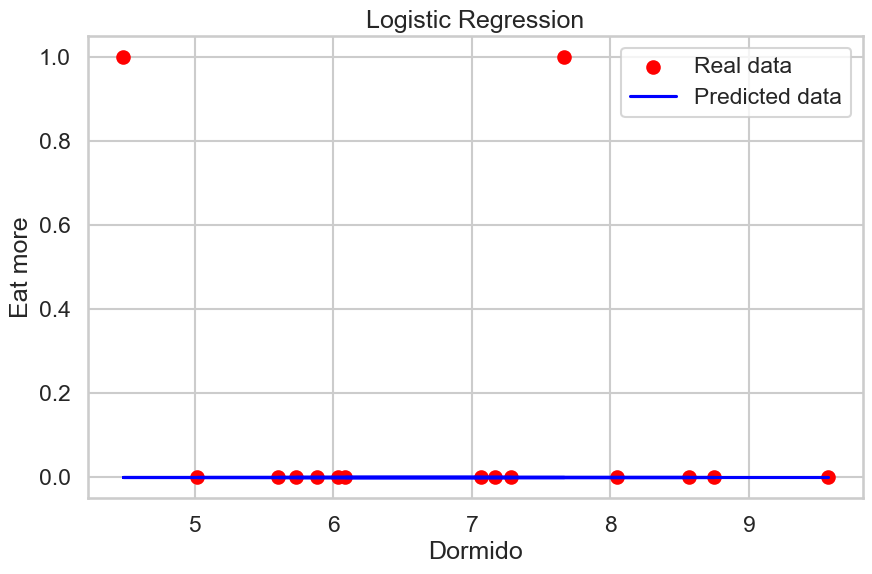

In [820]:
# Lets make a plot to visualize the model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# plot the model
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(10, 6))
plt.scatter(X_test['dormido'], y_test, color='red', label='Real data')
plt.plot(X_test['dormido'], y_pred, color='blue', label='Predicted data')
plt.title('Logistic Regression')
plt.xlabel('Dormido')
plt.ylabel('Eat more')
plt.legend()
plt.show()


c:\Users\Pablo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


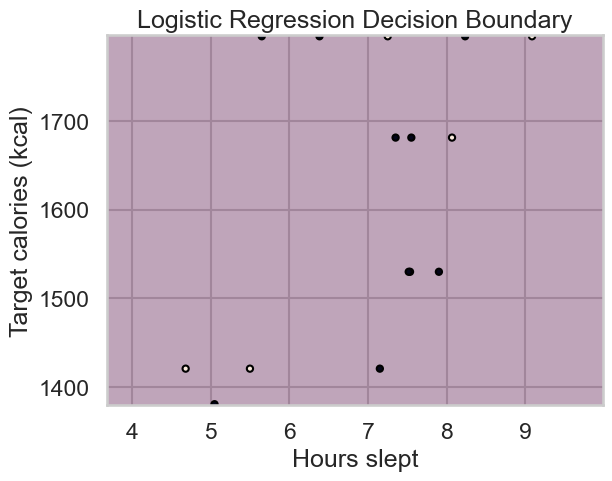

In [821]:
# creating a mesh grid to plot the decision boundary
dormido_min, dormido_max = X_train['dormido'].min() - 1, X_train['dormido'].max() + 1
target_calories_min, target_calories_max = X_train['Target Calories (kcal)'].min() - 1, X_train['Target Calories (kcal)'].max() + 1
dormido_grid, target_calories_grid = np.meshgrid(np.arange(dormido_min, dormido_max, 0.1), np.arange(target_calories_min, target_calories_max, 0.1))

# calculating the prediction on the mesh grid
Z = model.predict(np.array([dormido_grid.ravel(), target_calories_grid.ravel()]).T)
Z = Z.reshape(dormido_grid.shape)

# plotting the decision boundary
plt.contourf(dormido_grid, target_calories_grid, Z, alpha=0.4)
plt.scatter(X_train['dormido'], X_train['Target Calories (kcal)'], c=y_train, s=20, edgecolor='k')
plt.xlabel('Hours slept')
plt.ylabel('Target calories (kcal)')
plt.title('Logistic Regression Decision Boundary')
plt.show()

In [822]:
# making predictions on new data
new_data = np.array([[4, 1300]])
prediction = model.predict(new_data)
# if prediction is 1 change it to "You will overeat!"
if prediction == 1:
    prediction_verbose = "You will overeat!"
else:
    prediction_verbose = "You will not overeat!"
print('Prediction:', prediction)
print(prediction_verbose)

Prediction: [0]
You will not overeat!


c:\Users\Pablo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [823]:
# Calculate get the target calories of last record
target_calories = final_df['Target Calories (kcal)'].iloc[-1]
# get the coefficients of the model
coefficients = model.coef_
# calculate the intercept
intercept = model.intercept_
# calculate the probability of overeating
probability = 1 / (1 + np.exp(-(coefficients[0][0] * 7 + coefficients[0][1] * target_calories + intercept)))
# delete [] from probability
probability = probability[0]
# round to 2 decimals
probability = round(probability, 2)
# multiply by 100 to get percentage
probability = probability * 100
# add % to probability
probability = str(probability) + '%'
print('Your chance of overeating today and exceeding ' + str(target_calories) + ' ' + 'is ' + str(probability))

Your chance of overeating today and exceeding 1381 is 43.0%


In [ ]:
# # Let's now calculate how many hours of sleep would you need in order to have a probabily of overeating under 30%

# import numpy as np
# from scipy.optimize import minimize

# def objective_func(hours_sleep, target_calories, coefficients, intercept):
#     probability = 1 / (1 + np.exp(-(coefficients[0][0] * hours_sleep + coefficients[0][1] * target_calories + intercept)))
#     return probability[0]

# def minimum_hours_to_not_overeat(target_calories, coefficients, intercept, constraint=0.3):
#     result = minimize(objective_func, x0=7, args=(target_calories, coefficients, intercept), bounds=[(0, 24)])
#     hours_sleep = result.x[0]
#     probability = objective_func(hours_sleep, target_calories, coefficients, intercept)
#     if probability <= constraint:
#         return hours_sleep
#     else:
#         return None

# # Calculate get the target calories of last record
# target_calories = final_df['Target Calories (kcal)'].iloc[-1]
# # get the coefficients of the model
# coefficients = model.coef_
# # calculate the intercept
# intercept = model.intercept_

# min_hours = minimum_hours_to_not_overeat(target_calories, coefficients, intercept)

# if min_hours is not None:
#     print(f'You need to sleep for at least {min_hours:.2f} hours to have a probability of overeating under 30%.')
# else:
#     print('Cannot find a solution to have a probability of overeating under 30%.')